# Lab2

## Užduotis

Antroje užduotyje reikia realizuoti vaizdų klasifikavimo modelį.
Atsiskaitinėjant pratybų dėstytojas atsiųs testinių vaizdų, su kuriais turėsite pademonstruoti, kaip jūsų realizuotas modelis veikia.
Atsiskaitymo metu, turėsite gebėti papasakoti, kaip realizuotas, jūsų modelis.
Programinės įrangos sprendimą galite naudoti savo nuožiūra.

- [ ] Klasės pasirenkamos savo nuožiūra, tačiau jų turi būti bent 3.
- [ ] Duomenų rinkinys turi būti padalintas į mokymo ir testavimo aibes.
- [ ] Su testavimo duomenų aibe reikia paskaičiuoti šias metrikas: klasifikavimo matrica (angl. *confusion matrix*), tikslumas, precizija, atkūrimas ir F1.

Duomenų klasėms parinktos iš [OpenImages V6](https://storage.googleapis.com/openimages/web/index.html) objektų aptikimo uždavinio duomenų rinkinio.

## Įgyvendintų papildomų funkcijų papildomi balai $P_2$ pasirinktinai:

- [ ] Palyginimas palyginant aukšto lygio požymius (angl. _similiarity search_)
- [ ] Sukuriant vartotojo sąsają ir modelio iškvietimą per REST API.

### Duomenų atsiuntimas

```{bash}
brew install awscli
```

```{bash}
pipx install oidv6
```
```{bash}
oidv6 downloader --classes Airplane Bus Boat Train --type_data train --no-labels --limit 500 --dest_dir lab2/OIDv6/train
```
```{bash}
oidv6 downloader --classes Airplane Bus Boat Train --type_data test --no-labels --limit 100 --dest_dir lab2/OIDv6/test
```
```{bash}
oidv6 downloader --classes Airplane Bus Boat Train --type_data validation --no-labels --limit 100 --dest_dir lab2/OIDv6/validation
```

In [1]:
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torch.optim as optim
from importlib import reload
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
# Device
import torch

device: torch.device = torch.device('cpu')

if torch.backends.mps.is_available():
    device = torch.device("mps")
elif torch.cuda.is_available():
    device = torch.device("cuda:0")
else:
    print("WARN: Neither MPS nor CUDA device was found. Defaulting to cpu")

device

device(type='mps')

In [3]:
import lab2.model3
reload(lab2.model3)
from lab2.model3 import Model

model = Model().to(device)

In [4]:
import lab2.trans3
reload(lab2.trans3)
from lab2.trans3 import train_trans, validation_trans, test_trans

In [5]:
train_ds      = ImageFolder("lab2/OIDv6/train",      transform = train_trans)
validation_ds = ImageFolder("lab2/OIDv6/validation", transform = validation_trans)
test_ds       = ImageFolder("lab2/OIDv6/test",       transform = test_trans)

In [6]:
BATCH_SIZE = 512
train_dl      = DataLoader(train_ds,      shuffle = True,  batch_size = BATCH_SIZE, num_workers = 8)
validation_dl = DataLoader(validation_ds, shuffle = False, batch_size = BATCH_SIZE, num_workers = 8)
test_dl       = DataLoader(test_ds,       shuffle = False, batch_size = BATCH_SIZE, num_workers = 8)

In [7]:
LEARNING_RATE = 0.0005
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = LEARNING_RATE)

/Users/domantelio/Projects/gmm/.venv/lib/python3.12/site-packages/torch/nn/functional.py:1347: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
/Users/domantelio/Projects/gmm/.venv/lib/python3.12/site-packages/torch/nn/modules/module.py:1511: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Epoch [1/120] [50.96 secs] [Total time: 0 mins]


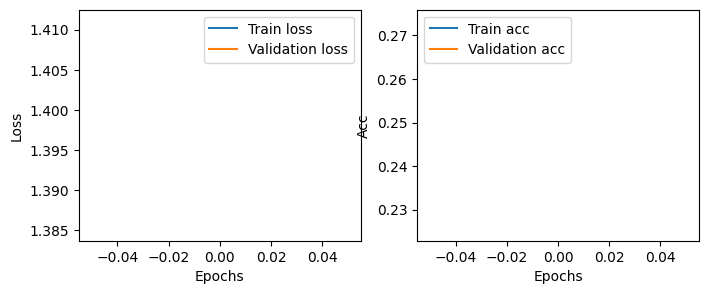

Epoch [2/120] [53.51 secs] [Total time: 1 mins]


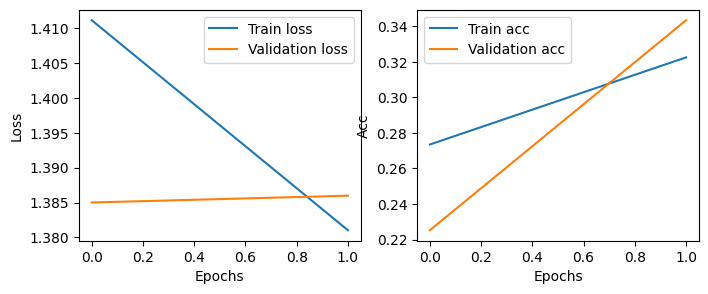

Epoch [3/120] [62.53 secs] [Total time: 2 mins]


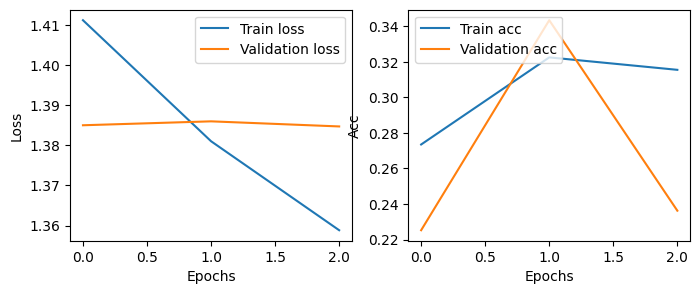

Epoch [4/120] [58.26 secs] [Total time: 3 mins]


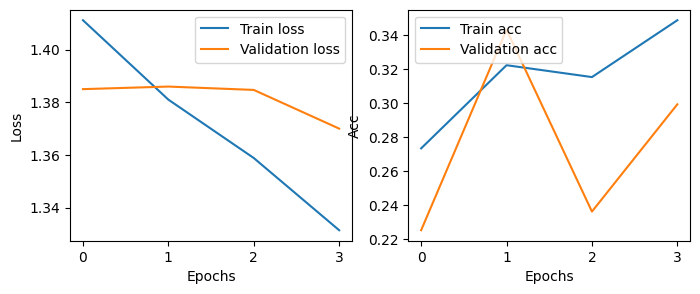

Epoch [5/120] [65.72 secs] [Total time: 4 mins]


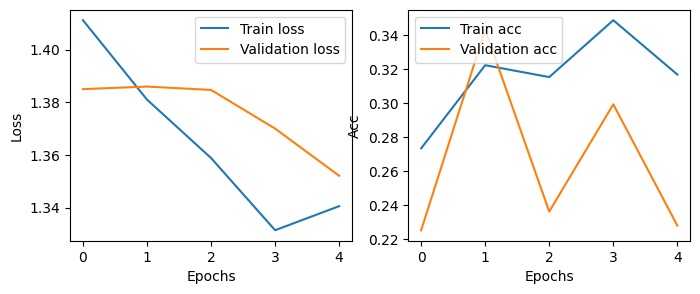

Epoch [6/120] [68.16 secs] [Total time: 6 mins]


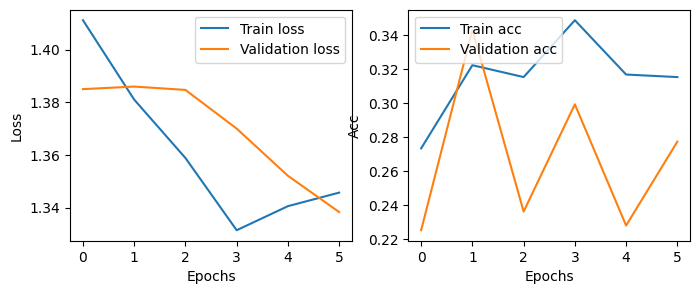

Epoch [7/120] [67.43 secs] [Total time: 7 mins]


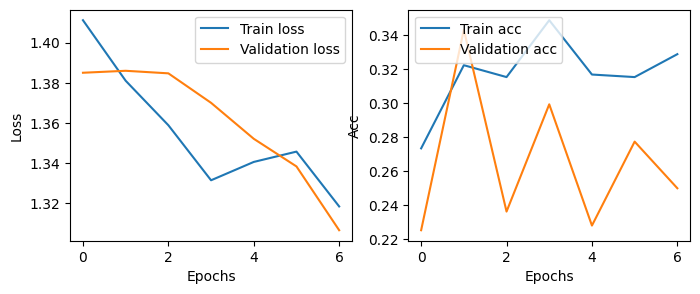

Epoch [8/120] [54.76 secs] [Total time: 8 mins]


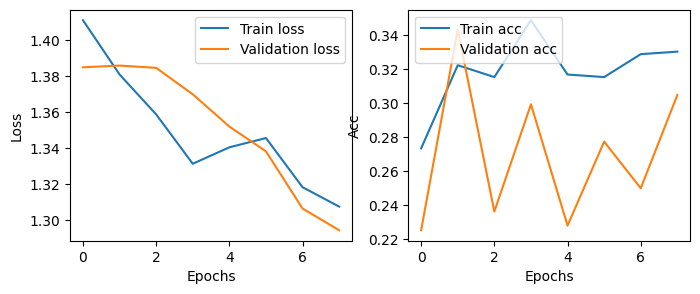

Epoch [9/120] [62.33 secs] [Total time: 9 mins]


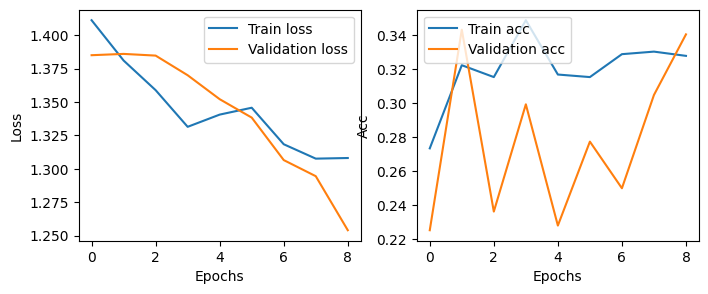

Epoch [10/120] [66.31 secs] [Total time: 10 mins]


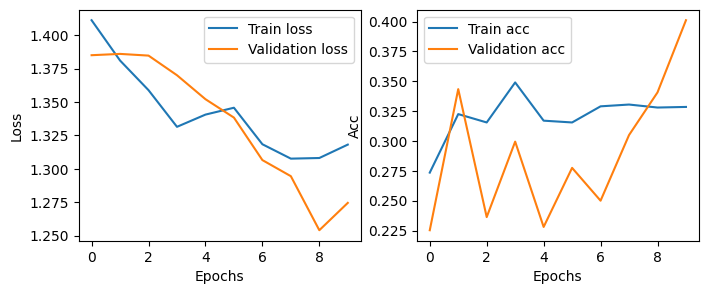

Epoch [11/120] [57.18 secs] [Total time: 11 mins]


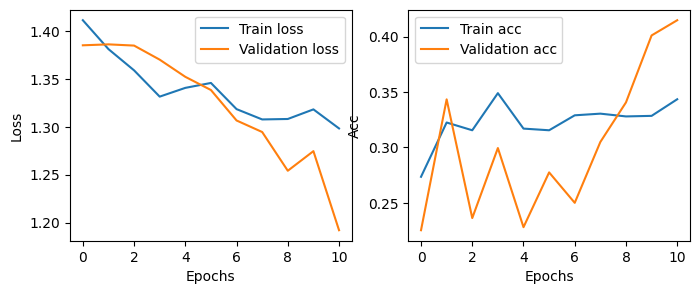

Epoch [12/120] [58.34 secs] [Total time: 12 mins]


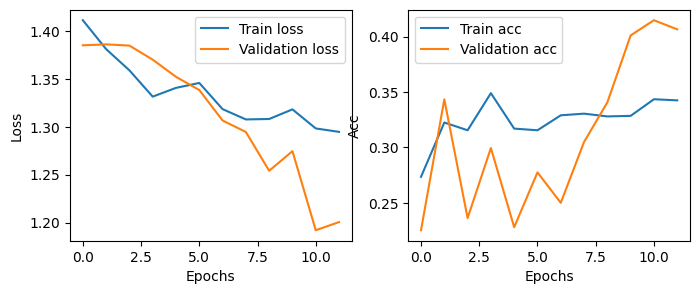

Epoch [13/120] [62.35 secs] [Total time: 13 mins]


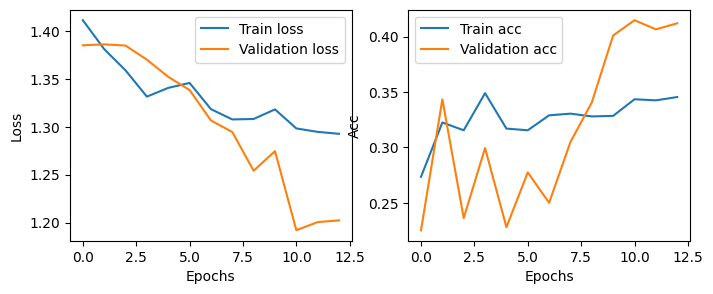

Epoch [14/120] [58.49 secs] [Total time: 14 mins]


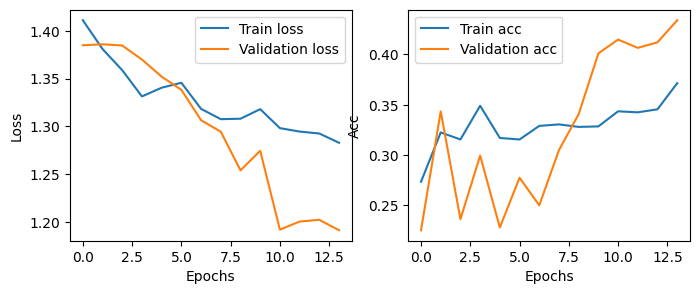

Epoch [15/120] [58.45 secs] [Total time: 15 mins]


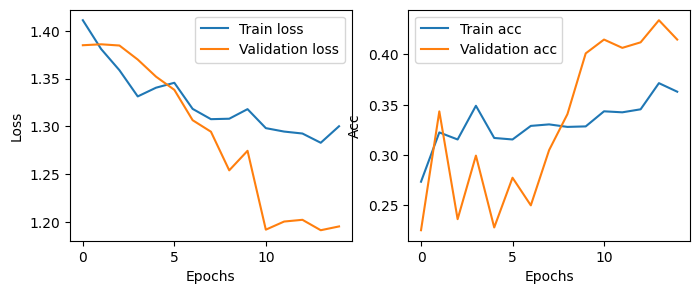

Epoch [16/120] [60.81 secs] [Total time: 16 mins]


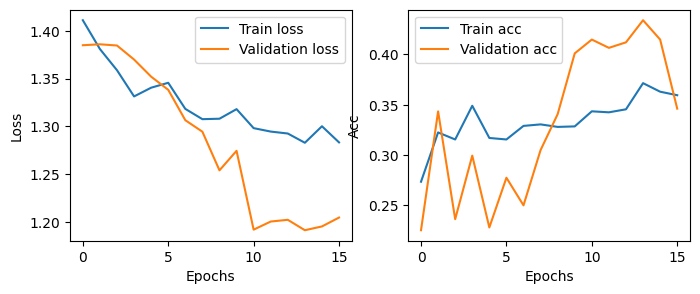

Epoch [17/120] [57.46 secs] [Total time: 17 mins]


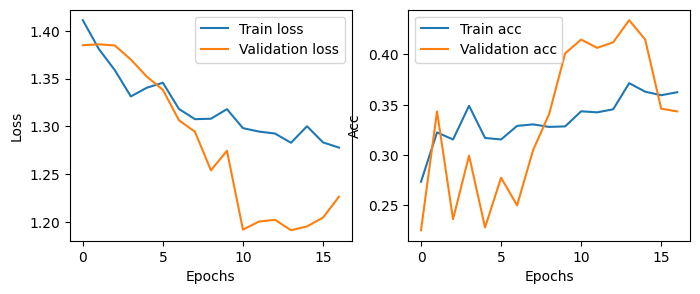

Epoch [18/120] [57.44 secs] [Total time: 18 mins]


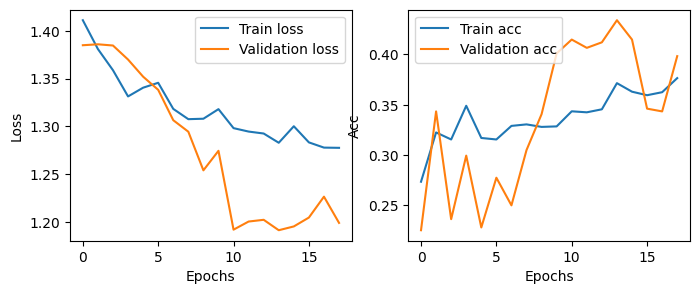

Epoch [19/120] [57.64 secs] [Total time: 19 mins]


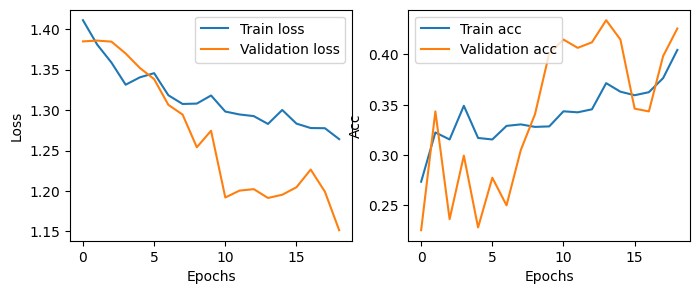

Epoch [20/120] [59.24 secs] [Total time: 20 mins]


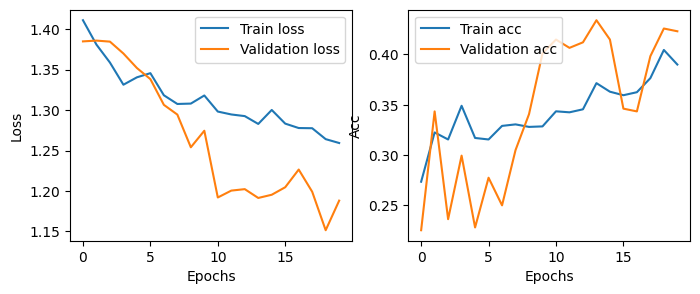

Epoch [21/120] [59.58 secs] [Total time: 21 mins]


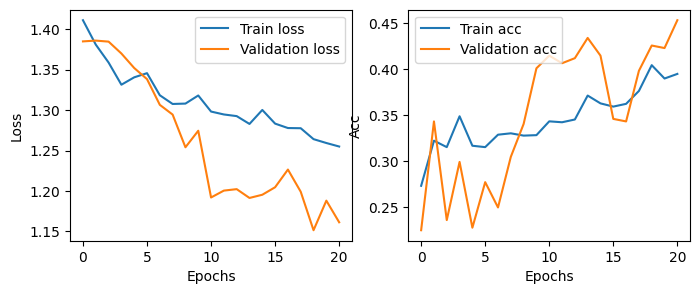

Epoch [22/120] [56.08 secs] [Total time: 22 mins]


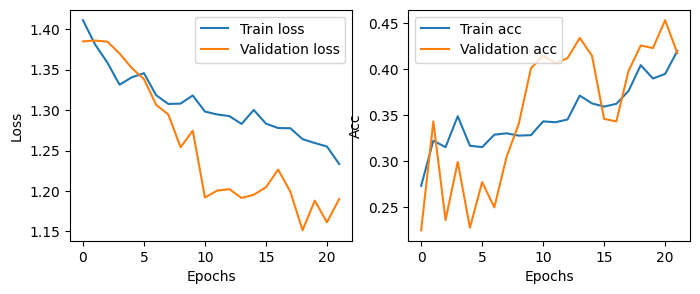

Epoch [23/120] [65.53 secs] [Total time: 23 mins]


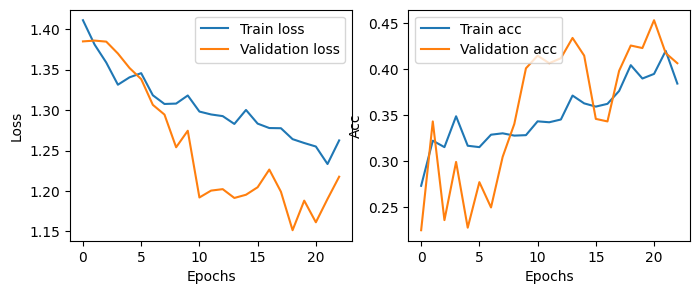

Epoch [24/120] [65.64 secs] [Total time: 24 mins]


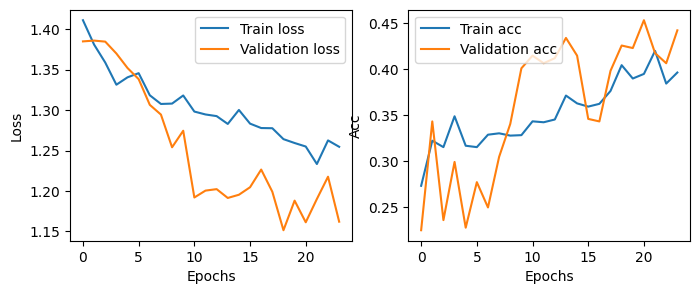

Epoch [25/120] [60.14 secs] [Total time: 25 mins]


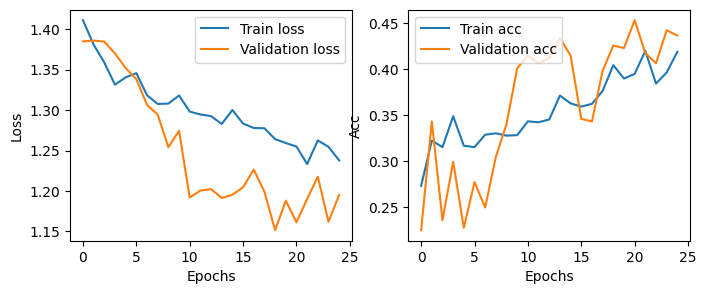

Epoch [26/120] [60.83 secs] [Total time: 26 mins]


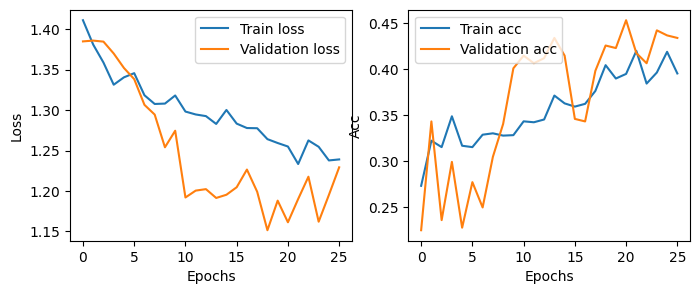

Epoch [27/120] [62.09 secs] [Total time: 27 mins]


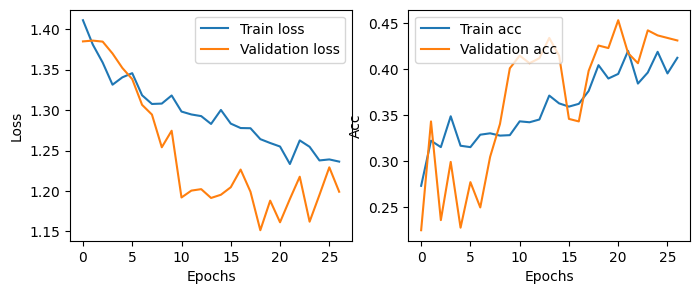

Epoch [28/120] [66.32 secs] [Total time: 28 mins]


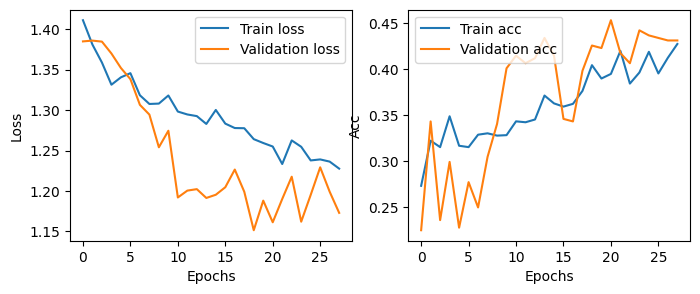

Epoch [29/120] [60.28 secs] [Total time: 29 mins]


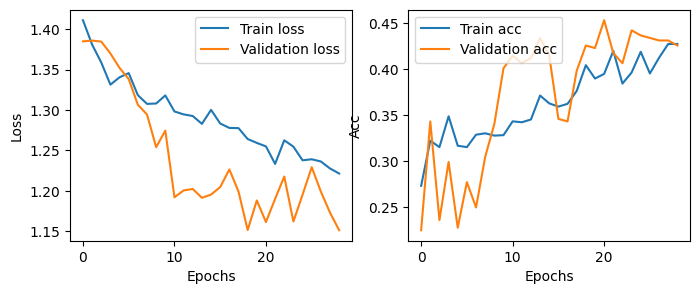

Epoch [30/120] [62.10 secs] [Total time: 30 mins]


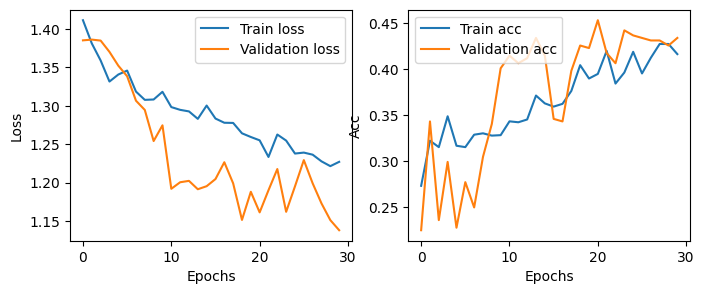

Epoch [31/120] [85.47 secs] [Total time: 31 mins]


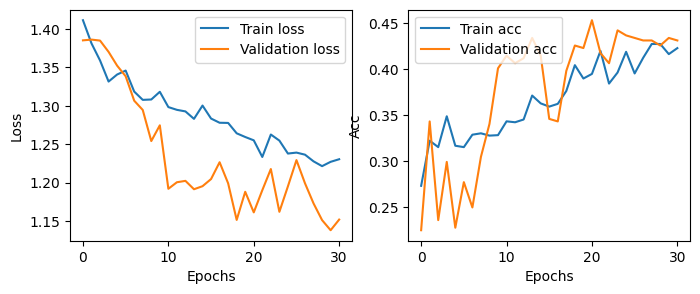

Epoch [32/120] [84.66 secs] [Total time: 33 mins]


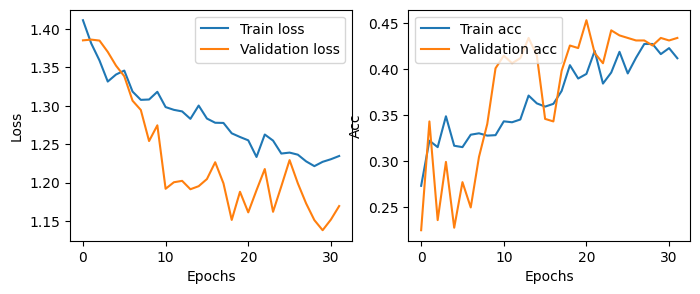

Epoch [33/120] [82.13 secs] [Total time: 34 mins]


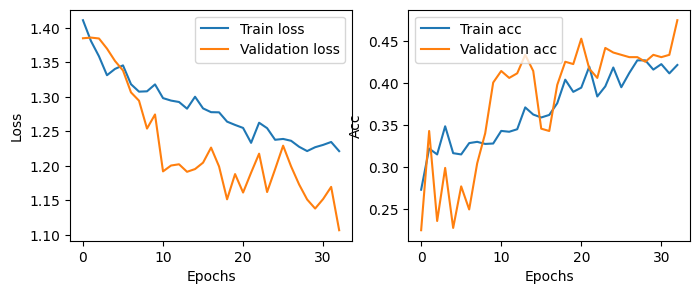

Epoch [34/120] [82.51 secs] [Total time: 36 mins]


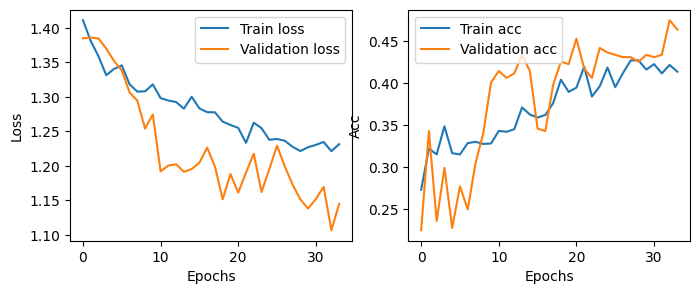

Epoch [35/120] [1784.32 secs] [Total time: 65 mins]


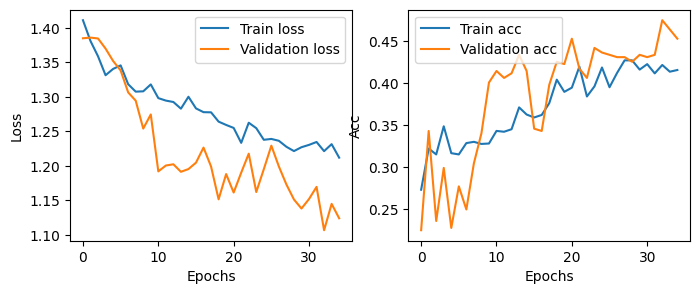

Epoch [36/120] [279.82 secs] [Total time: 70 mins]


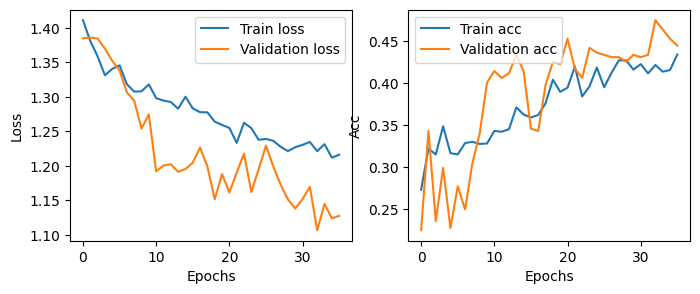

Epoch [37/120] [414.80 secs] [Total time: 77 mins]


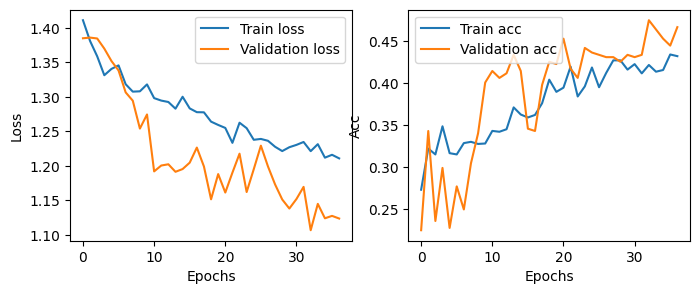

Epoch [38/120] [122.47 secs] [Total time: 79 mins]


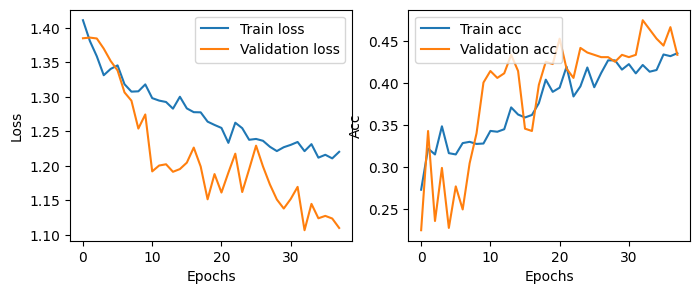

Epoch [39/120] [100.35 secs] [Total time: 81 mins]


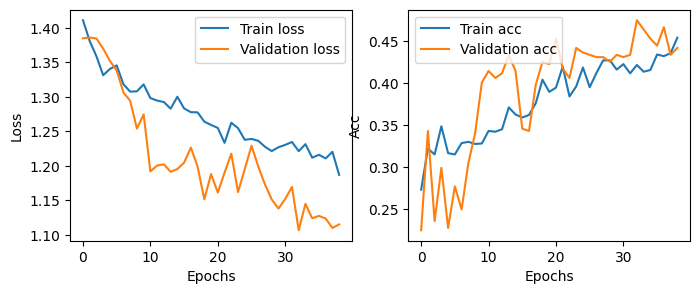

Epoch [40/120] [93.05 secs] [Total time: 82 mins]


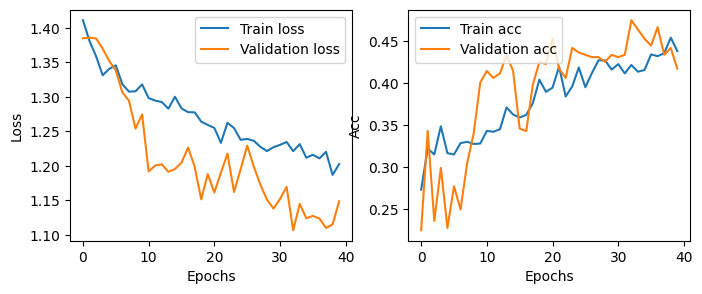

Epoch [41/120] [85.67 secs] [Total time: 84 mins]


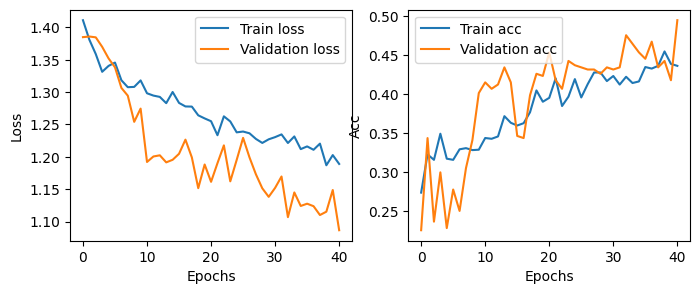

Epoch [42/120] [82.10 secs] [Total time: 85 mins]


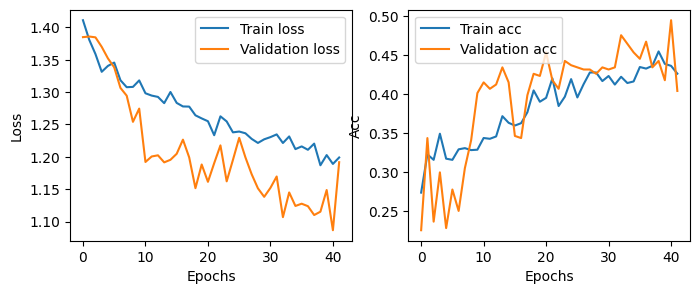

Epoch [43/120] [85.19 secs] [Total time: 86 mins]


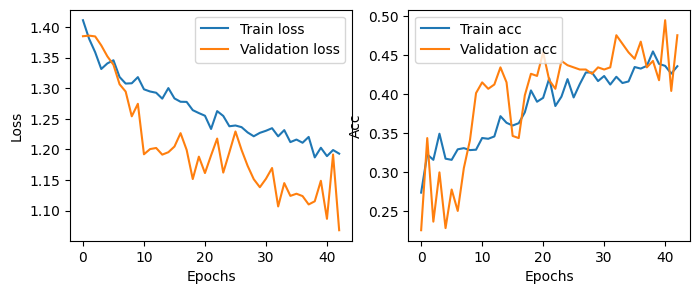

Epoch [44/120] [88.17 secs] [Total time: 88 mins]


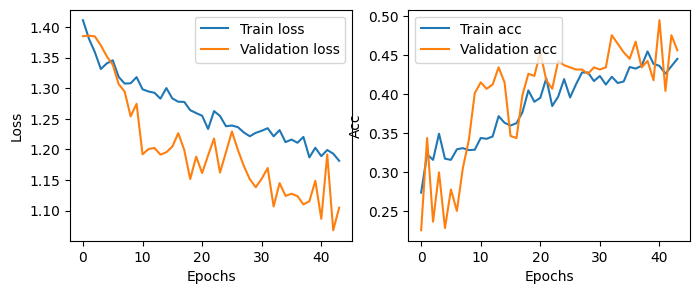

Epoch [45/120] [94.96 secs] [Total time: 89 mins]


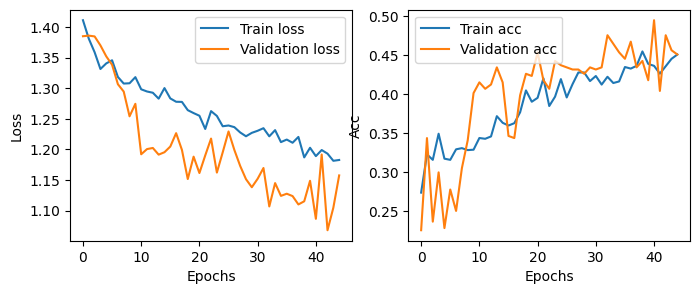

Epoch [46/120] [86.16 secs] [Total time: 91 mins]


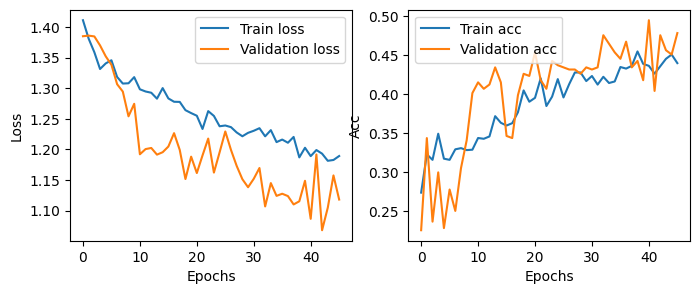

Epoch [47/120] [82.87 secs] [Total time: 92 mins]


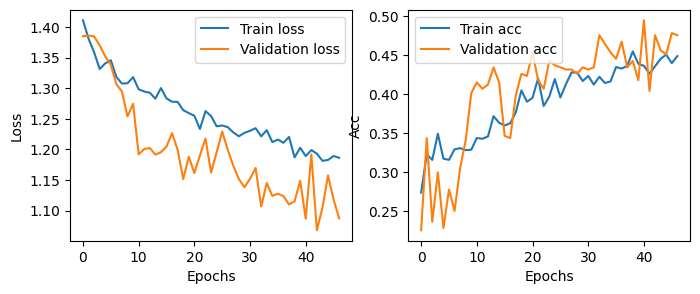

Epoch [48/120] [93.15 secs] [Total time: 94 mins]


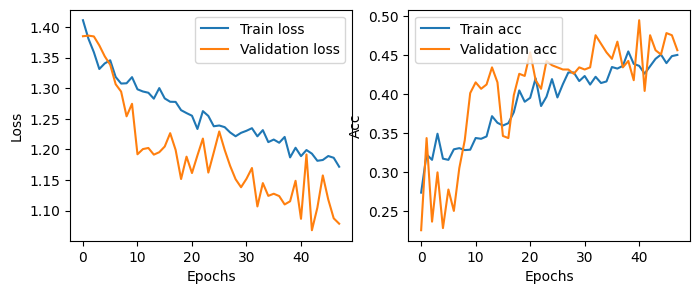

Epoch [49/120] [79.87 secs] [Total time: 95 mins]


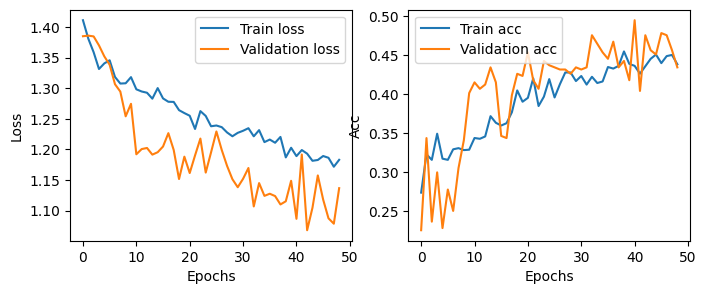

Epoch [50/120] [93.58 secs] [Total time: 97 mins]


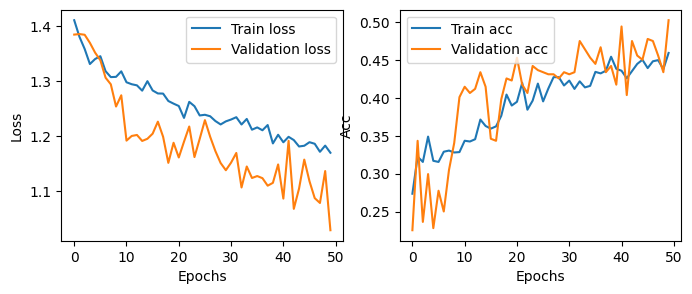

Epoch [51/120] [93.92 secs] [Total time: 98 mins]


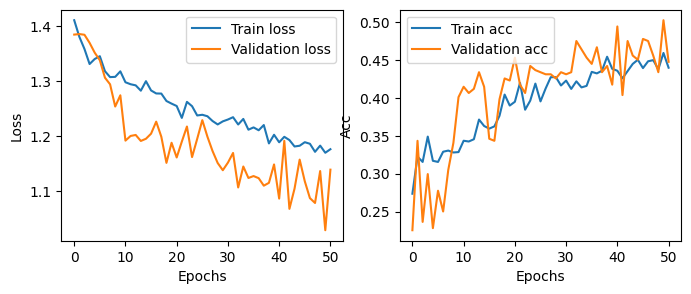

Epoch [52/120] [91.41 secs] [Total time: 100 mins]


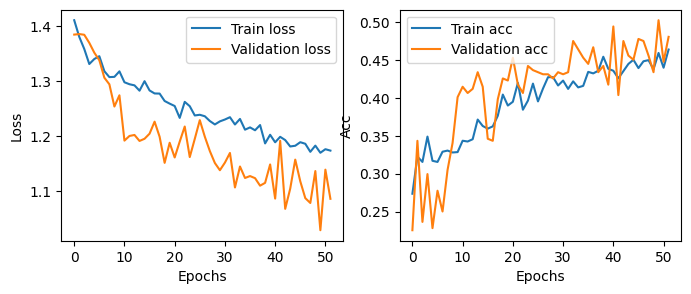

Epoch [53/120] [93.20 secs] [Total time: 101 mins]


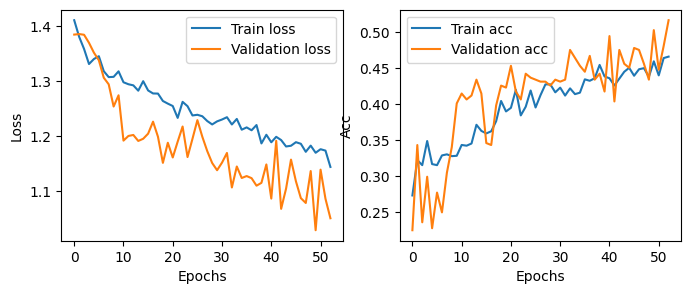

Epoch [54/120] [88.84 secs] [Total time: 103 mins]


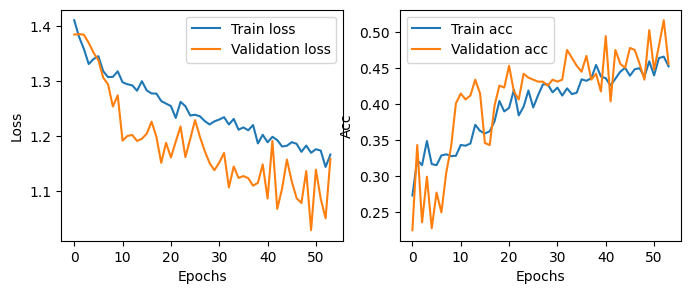

Epoch [55/120] [85.66 secs] [Total time: 104 mins]


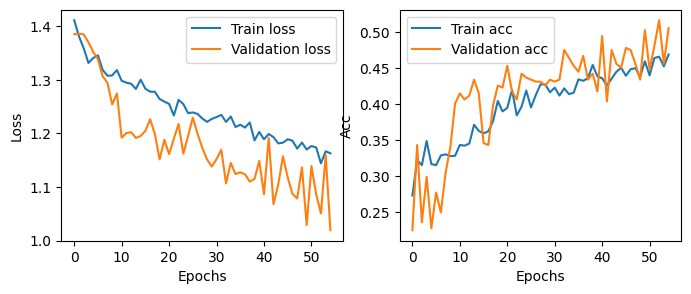

Epoch [56/120] [88.40 secs] [Total time: 106 mins]


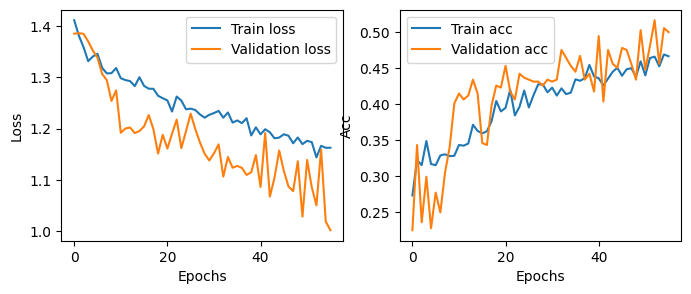

Epoch [57/120] [88.69 secs] [Total time: 107 mins]


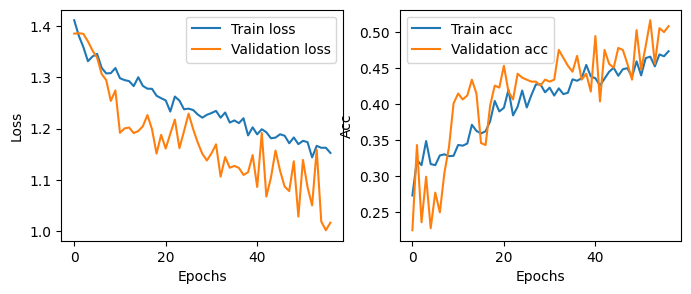

Epoch [58/120] [85.68 secs] [Total time: 109 mins]


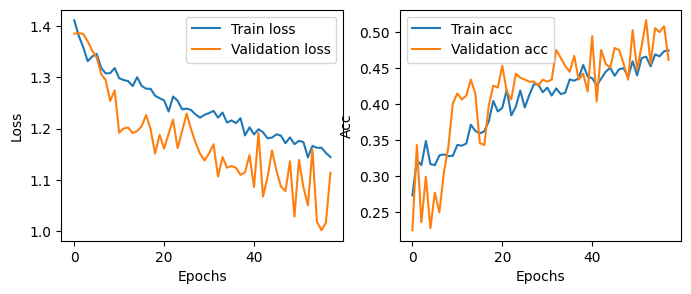

Epoch [59/120] [86.55 secs] [Total time: 110 mins]


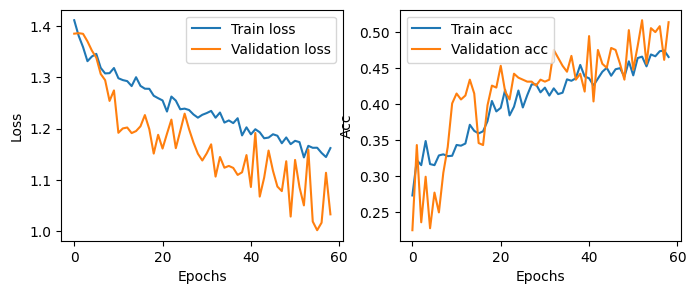

Epoch [60/120] [88.21 secs] [Total time: 112 mins]


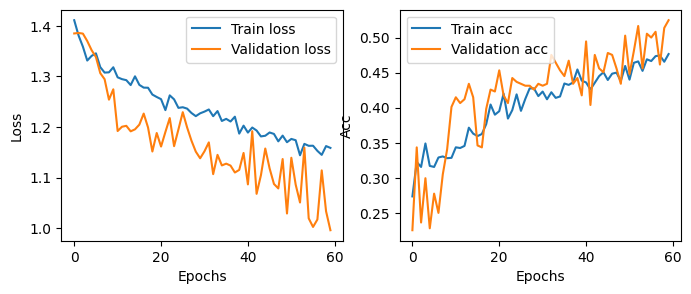

Epoch [61/120] [108.43 secs] [Total time: 114 mins]


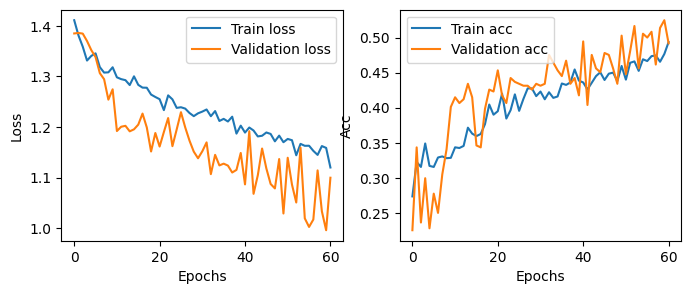

Epoch [62/120] [89.72 secs] [Total time: 115 mins]


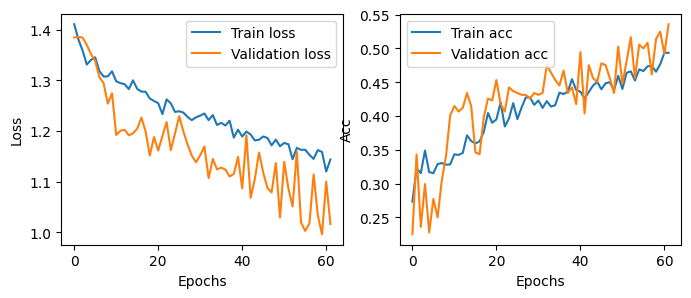

Epoch [63/120] [115.24 secs] [Total time: 117 mins]


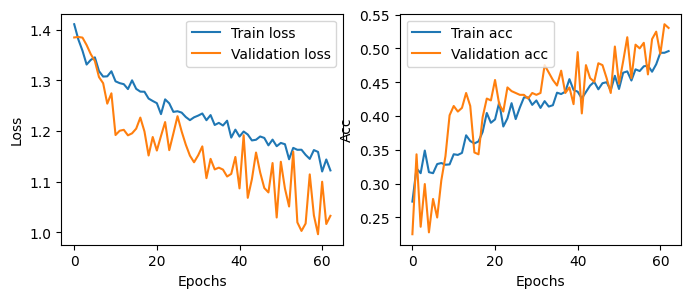

Epoch [64/120] [89.97 secs] [Total time: 118 mins]


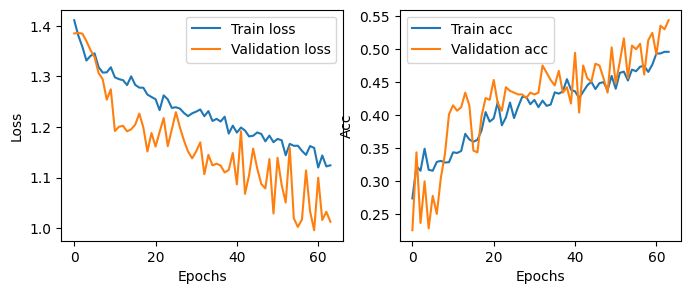

Epoch [65/120] [103.89 secs] [Total time: 120 mins]


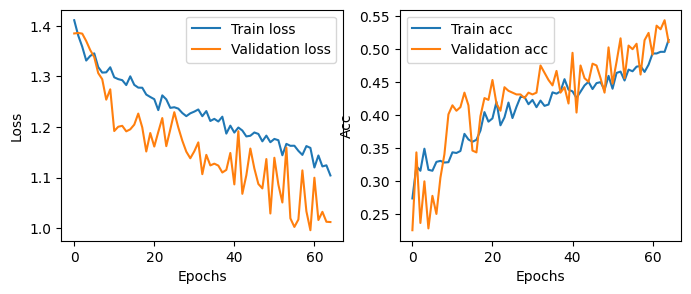

Epoch [66/120] [89.32 secs] [Total time: 122 mins]


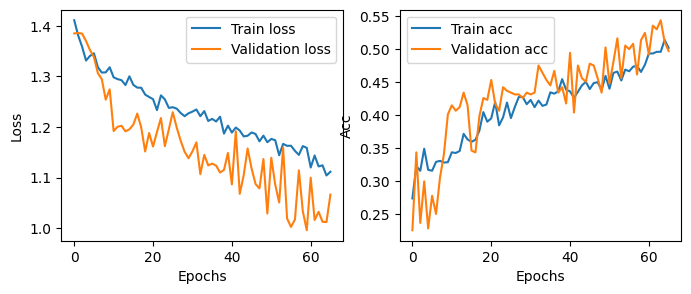

Epoch [67/120] [97.46 secs] [Total time: 123 mins]


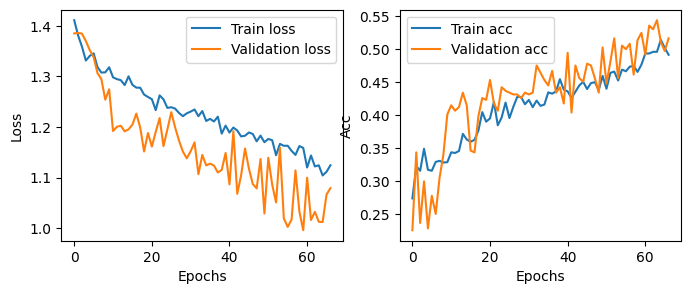

Epoch [68/120] [101.41 secs] [Total time: 125 mins]


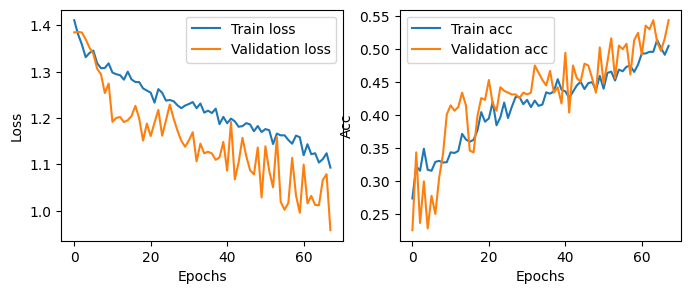

Epoch [69/120] [105.56 secs] [Total time: 127 mins]


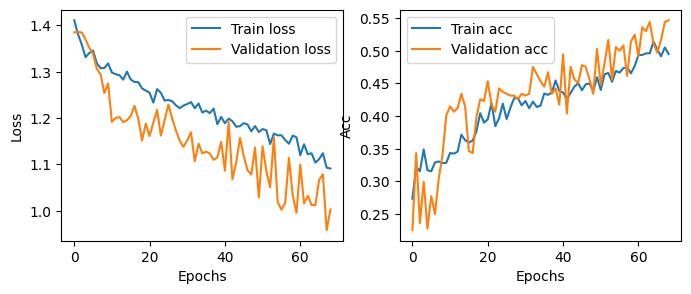

Epoch [70/120] [97.58 secs] [Total time: 128 mins]


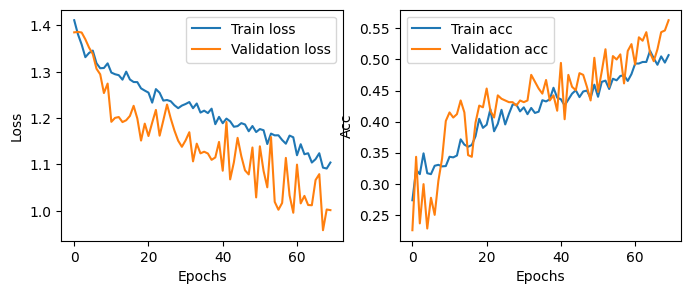

Epoch [71/120] [95.68 secs] [Total time: 130 mins]


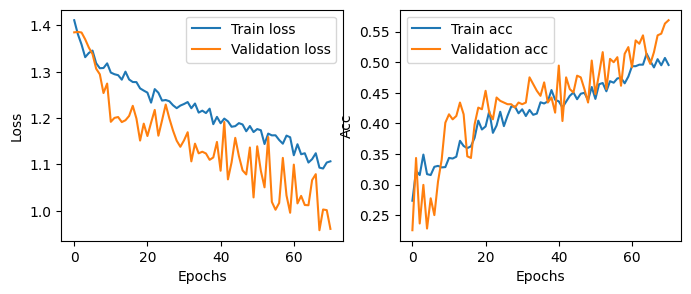

Epoch [72/120] [88.58 secs] [Total time: 131 mins]


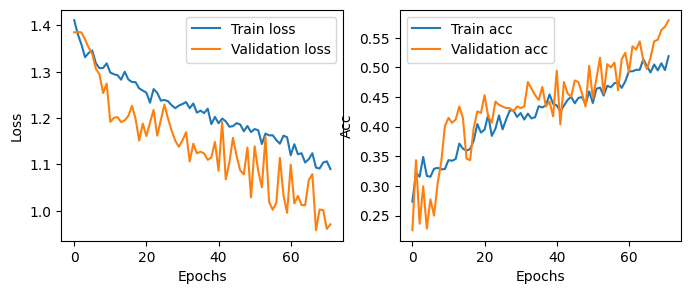

Epoch [73/120] [93.12 secs] [Total time: 133 mins]


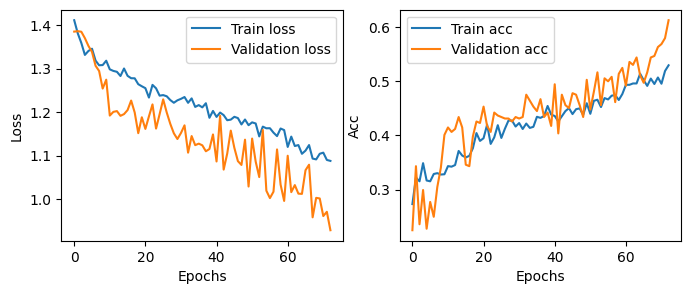

Epoch [74/120] [105.09 secs] [Total time: 135 mins]


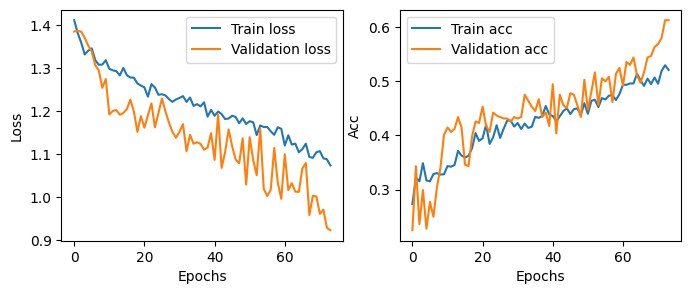

Epoch [75/120] [89.45 secs] [Total time: 136 mins]


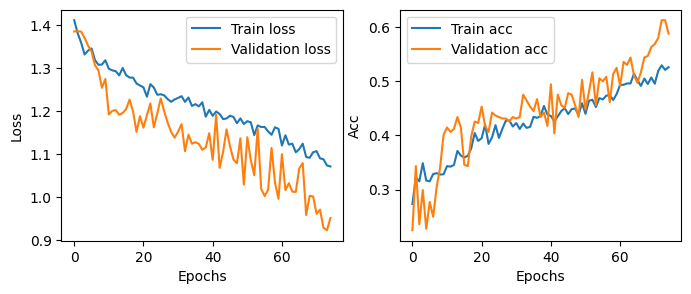

Epoch [76/120] [97.82 secs] [Total time: 138 mins]


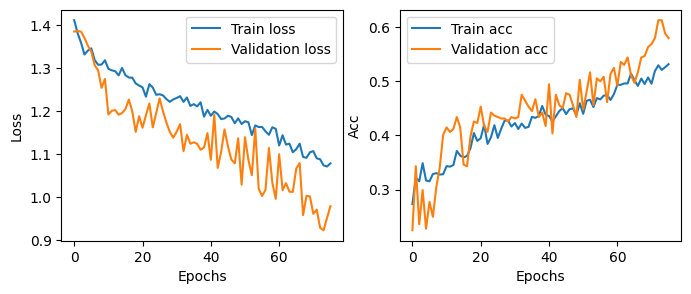

Epoch [77/120] [92.95 secs] [Total time: 140 mins]


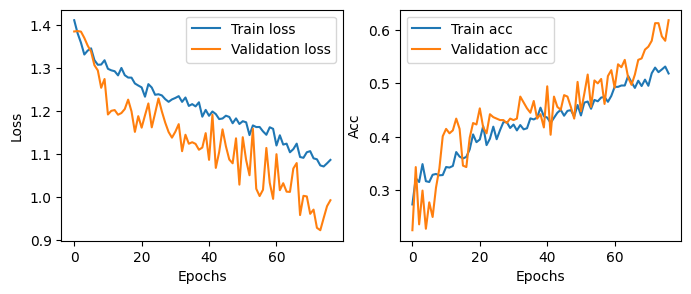

Epoch [78/120] [90.24 secs] [Total time: 141 mins]


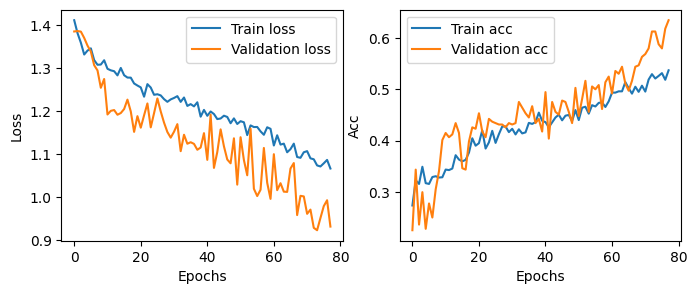

Epoch [79/120] [85.88 secs] [Total time: 142 mins]


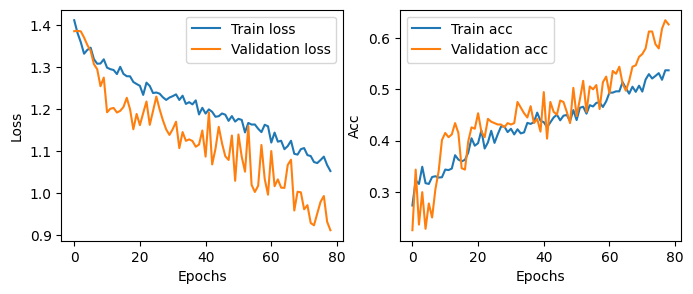

Epoch [80/120] [102.61 secs] [Total time: 144 mins]


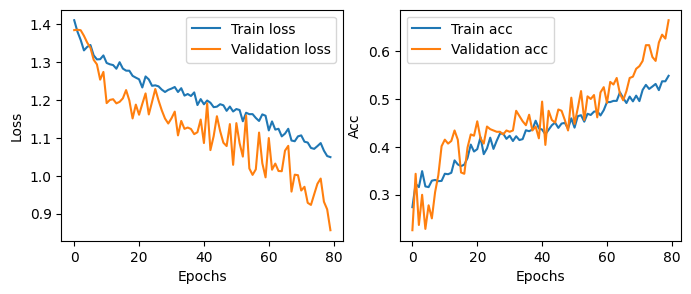

Epoch [81/120] [87.04 secs] [Total time: 146 mins]


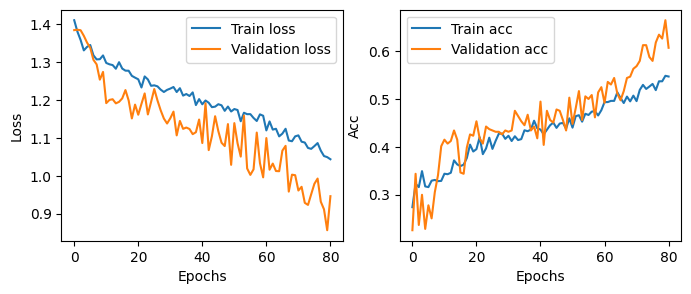

Epoch [82/120] [90.56 secs] [Total time: 147 mins]


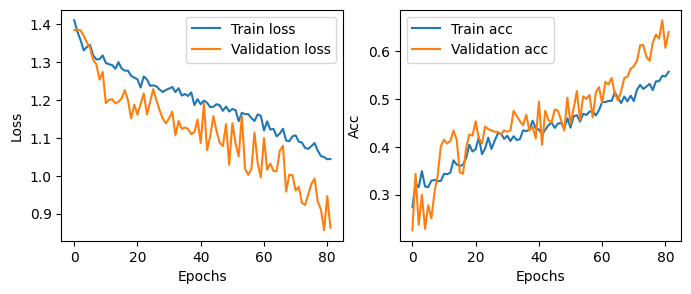

Epoch [83/120] [96.46 secs] [Total time: 149 mins]


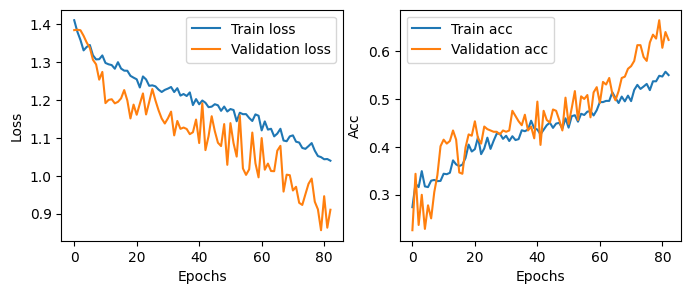

Epoch [84/120] [86.39 secs] [Total time: 150 mins]


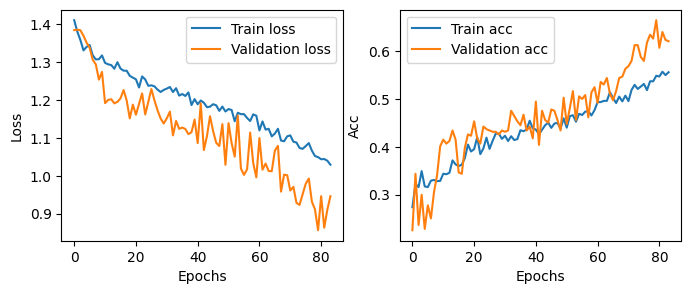

Epoch [85/120] [84.67 secs] [Total time: 152 mins]


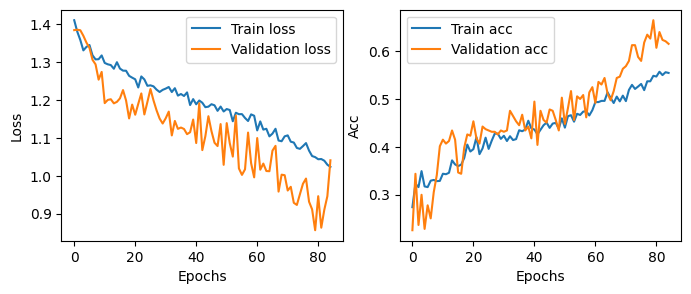

Epoch [86/120] [83.00 secs] [Total time: 153 mins]


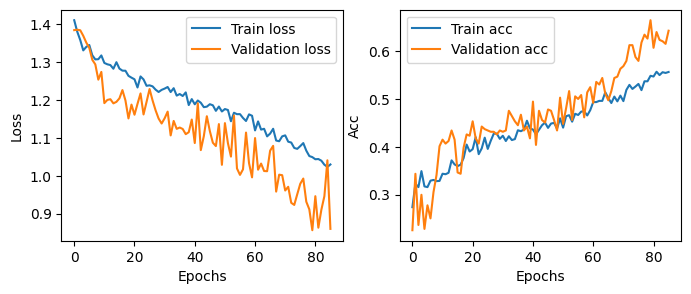

Epoch [87/120] [80.68 secs] [Total time: 154 mins]


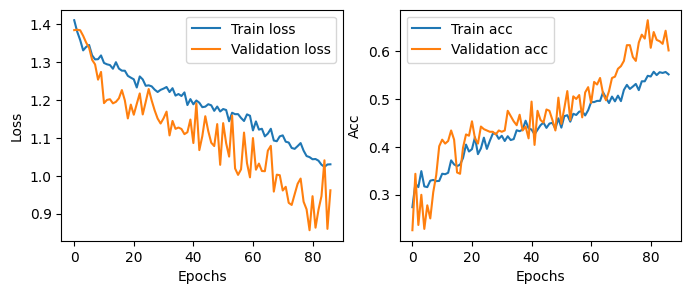

Epoch [88/120] [85.45 secs] [Total time: 156 mins]


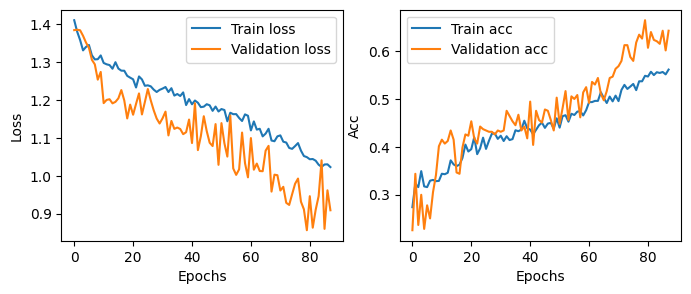

Epoch [89/120] [96.08 secs] [Total time: 157 mins]


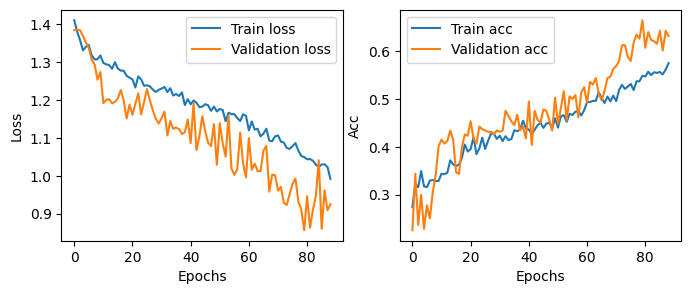

Epoch [90/120] [90.60 secs] [Total time: 159 mins]


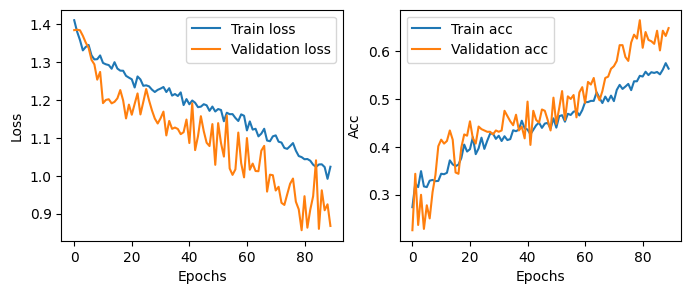

Epoch [91/120] [84.31 secs] [Total time: 160 mins]


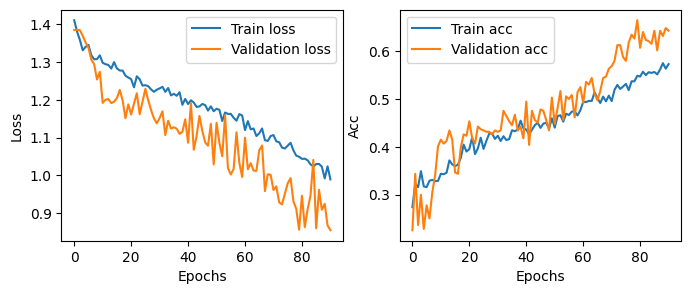

Epoch [92/120] [98.19 secs] [Total time: 162 mins]


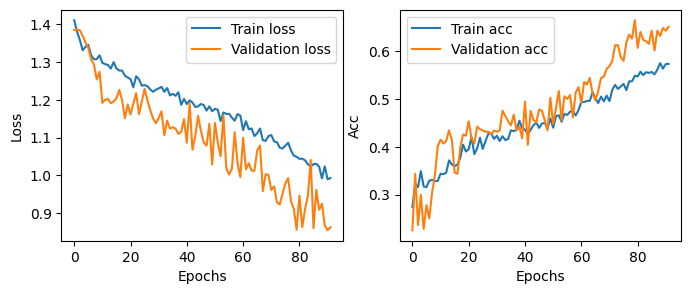

Epoch [93/120] [81.85 secs] [Total time: 163 mins]


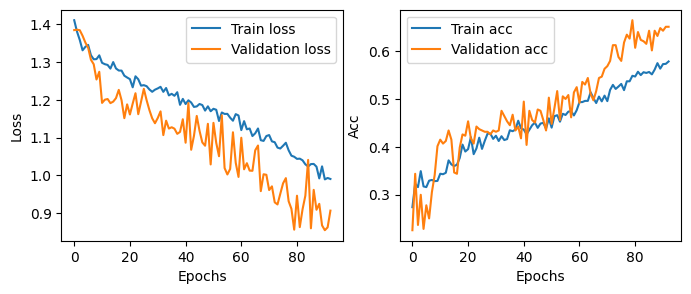

Epoch [94/120] [91.79 secs] [Total time: 165 mins]


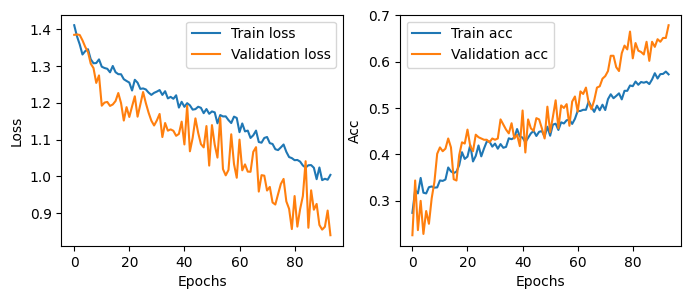

Epoch [95/120] [141.61 secs] [Total time: 167 mins]


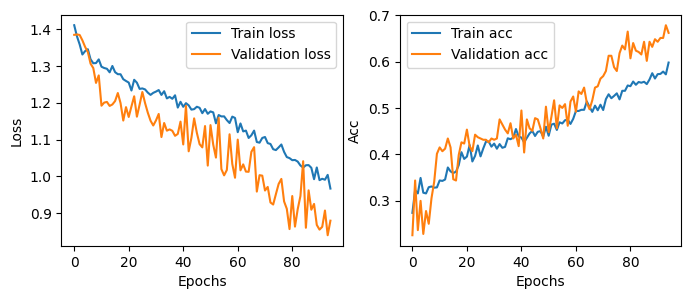

Epoch [96/120] [276.58 secs] [Total time: 172 mins]


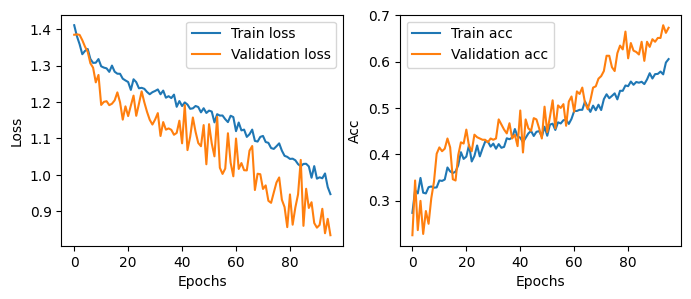

Epoch [97/120] [767.73 secs] [Total time: 185 mins]


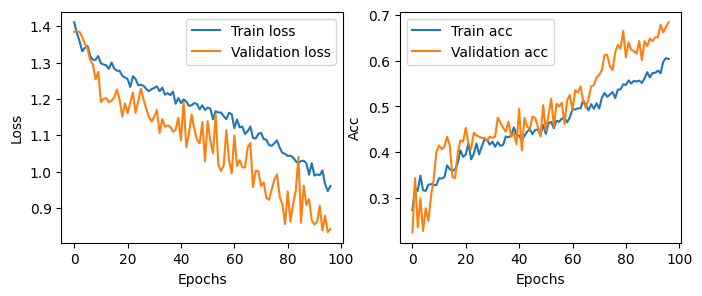

Epoch [98/120] [106.44 secs] [Total time: 186 mins]


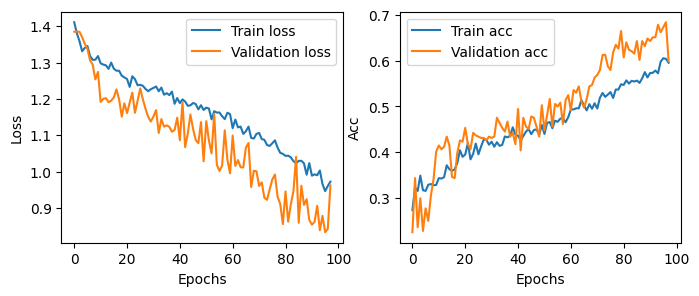

Epoch [99/120] [89.92 secs] [Total time: 188 mins]


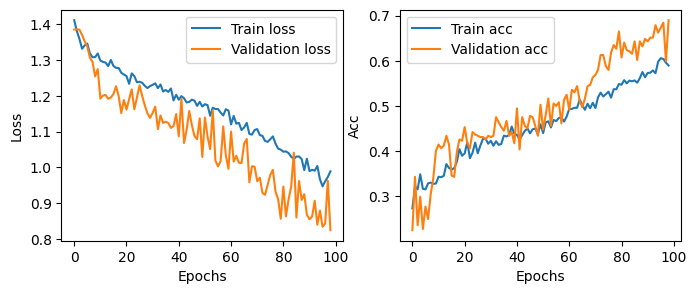

Epoch [100/120] [94.12 secs] [Total time: 190 mins]


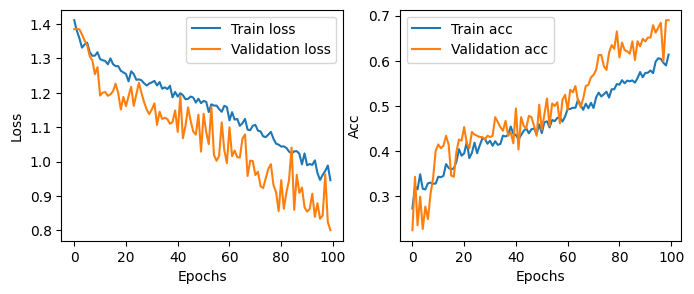

Epoch [101/120] [113.68 secs] [Total time: 191 mins]


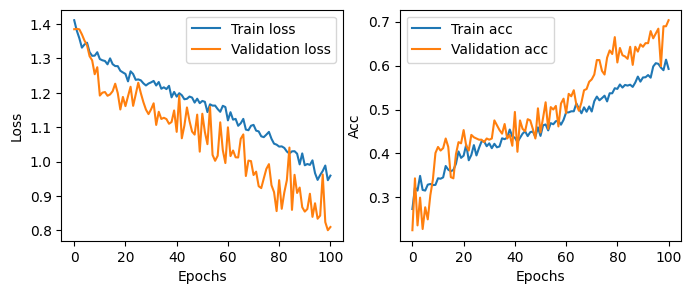

Epoch [102/120] [62.93 secs] [Total time: 192 mins]


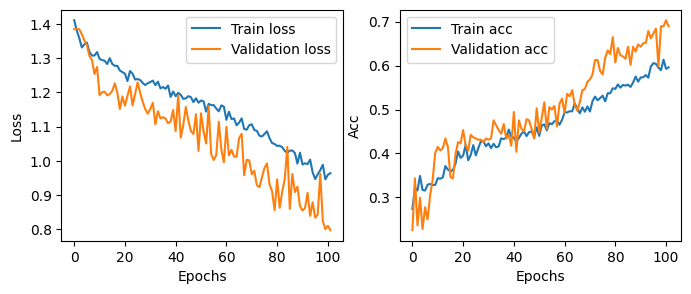

Epoch [103/120] [63.50 secs] [Total time: 194 mins]


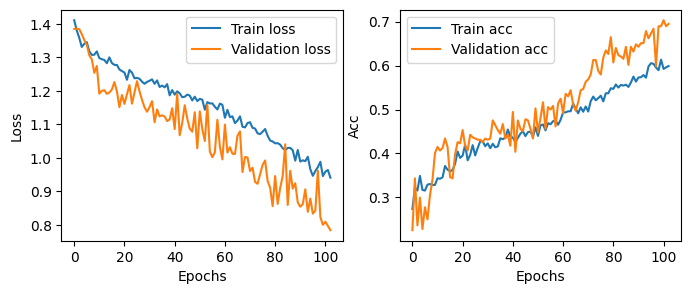

Epoch [104/120] [64.56 secs] [Total time: 195 mins]


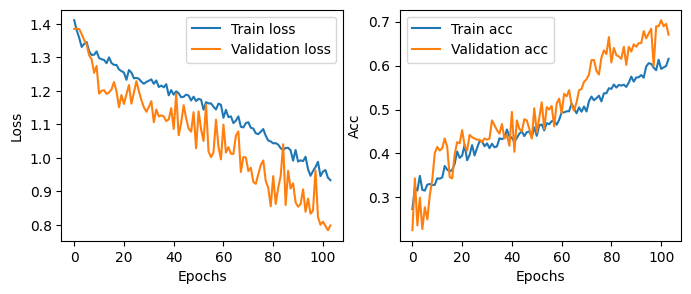

Epoch [105/120] [68.97 secs] [Total time: 196 mins]


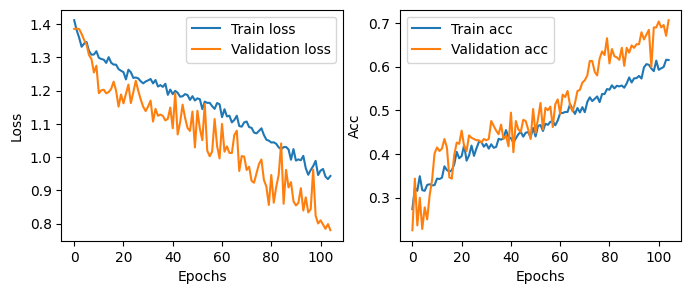

Epoch [106/120] [65.17 secs] [Total time: 197 mins]


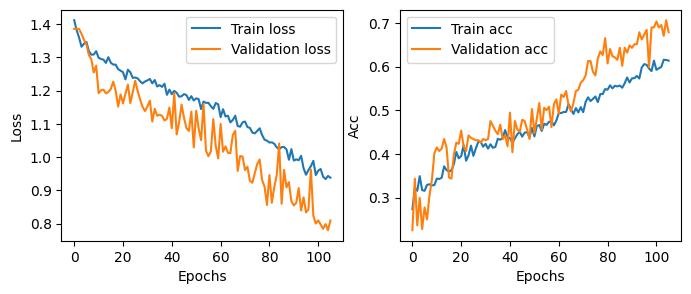

Epoch [107/120] [68.10 secs] [Total time: 198 mins]


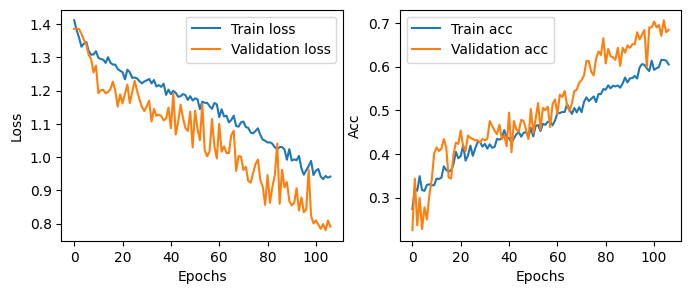

Epoch [108/120] [69.42 secs] [Total time: 199 mins]


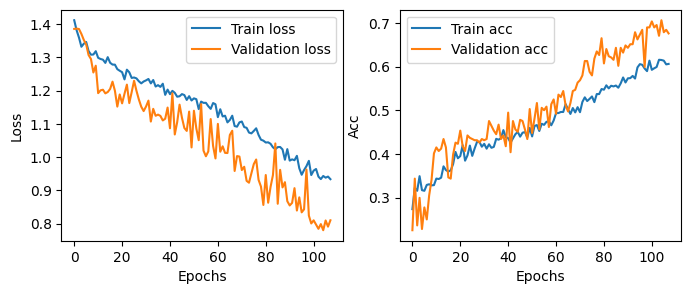

Epoch [109/120] [70.24 secs] [Total time: 200 mins]


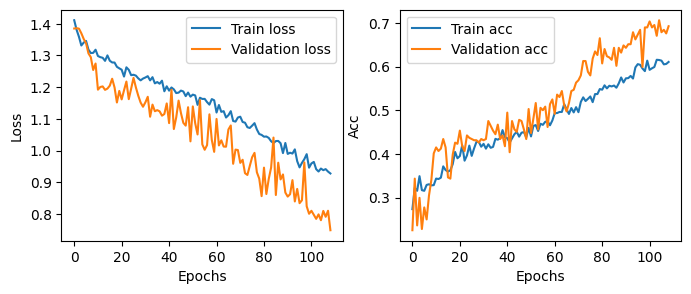

Epoch [110/120] [66.25 secs] [Total time: 201 mins]


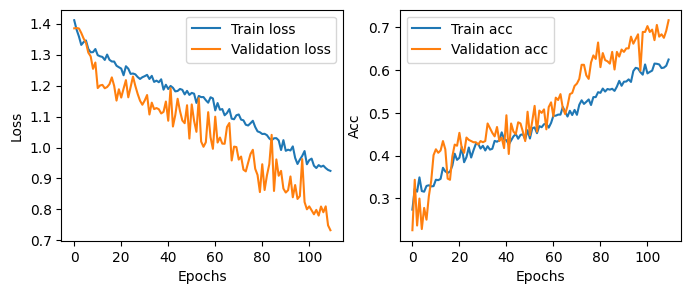

Epoch [111/120] [62.16 secs] [Total time: 203 mins]


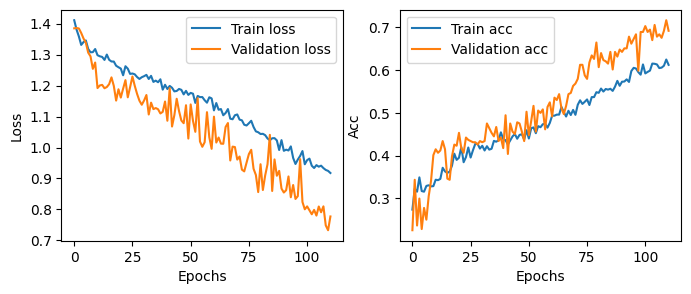

Epoch [112/120] [61.41 secs] [Total time: 204 mins]


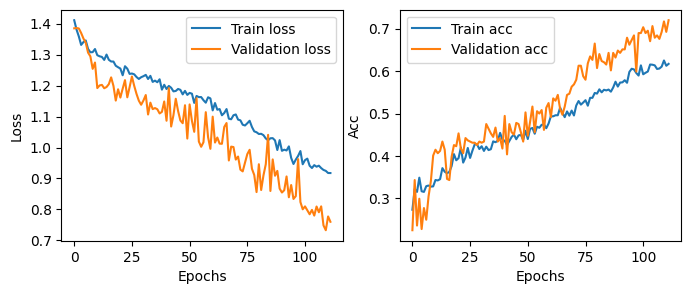

Epoch [113/120] [71.28 secs] [Total time: 205 mins]


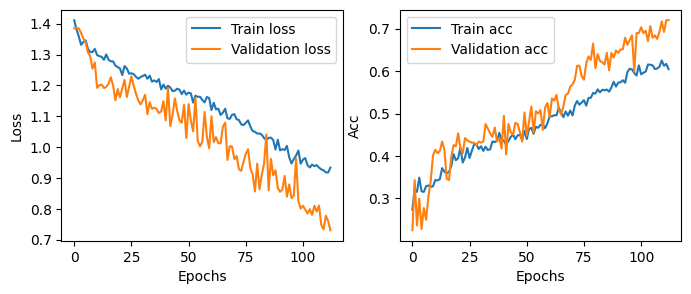

Epoch [114/120] [62.59 secs] [Total time: 206 mins]


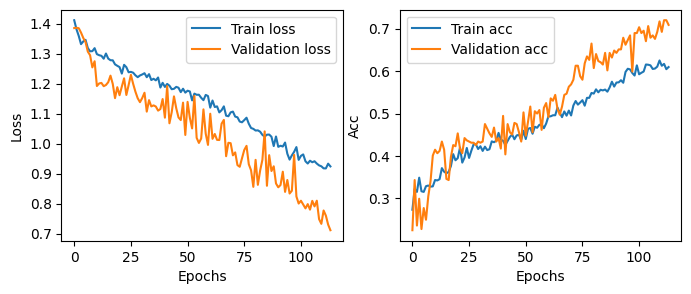

Epoch [115/120] [82.03 secs] [Total time: 207 mins]


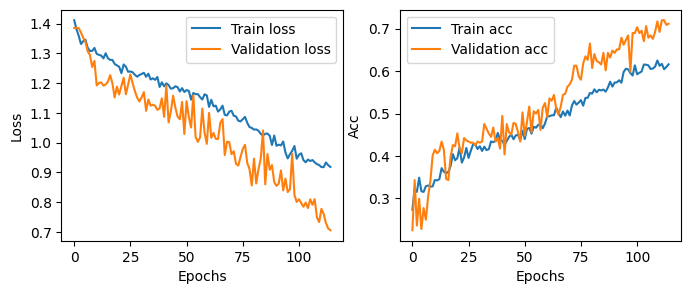

Epoch [116/120] [60.86 secs] [Total time: 208 mins]


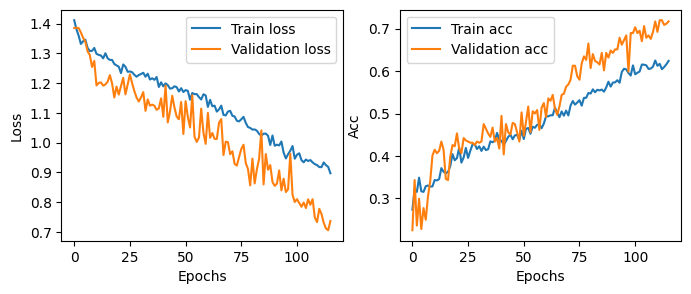

Epoch [117/120] [70.54 secs] [Total time: 209 mins]


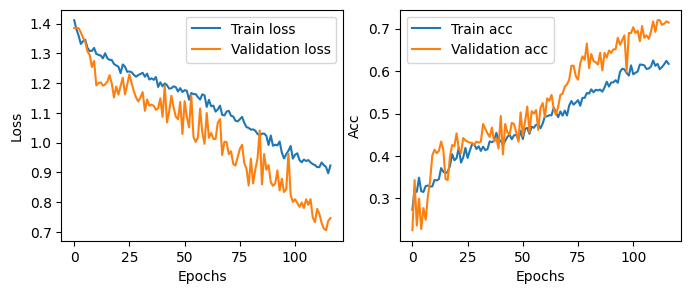

Epoch [118/120] [82.11 secs] [Total time: 211 mins]


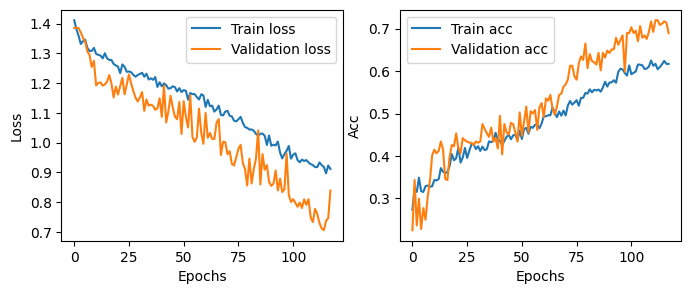

Epoch [119/120] [81.85 secs] [Total time: 212 mins]


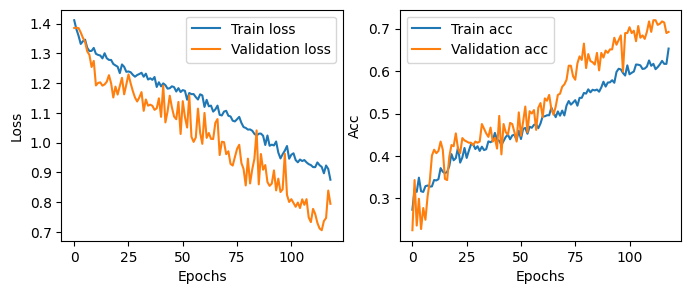

Epoch [120/120] [73.29 secs] [Total time: 213 mins]


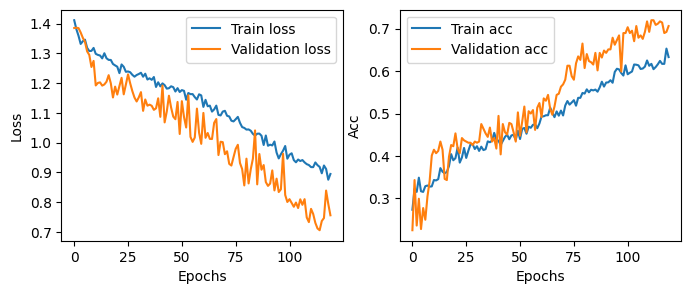

In [8]:
from torch import cat as c
from torch import tensor as t

import time

import lab2.graphs
reload(lab2.graphs)
from lab2.graphs import display_loss, display_acc

train_history = {
  'ls': torch.zeros(0),
  'ys': torch.zeros(0, 0),
  'y_hats': torch.zeros(0, 0)
}; th = train_history

validation_history = {
  'ls': torch.zeros(0),
  'ys': torch.zeros(0, 0),
  'y_hats': torch.zeros(0, 0)
}; vh = validation_history

NUM_EPOCHS = 120
VALIDATE = True

softmax = nn.Softmax()
start_time = time.time()
time_ = start_time

for epoch in range(NUM_EPOCHS):
  model.train()

  l = t([])
  y = t([])
  y_hat = t([])
  ix = -1
  for inputs, labels in train_dl:
    inputs, labels = inputs.to(device), labels.to(device)

    optimizer.zero_grad()

    outputs = model(inputs)
    loss = criterion(outputs, labels)

    loss.backward()
    optimizer.step()

    optimizer.zero_grad()

    y =     c((y, labels.detach().cpu().to("cpu")), dim = -1)
    y_hat = c((y_hat, softmax(outputs).argmax(dim = -1).detach().cpu().to("cpu")), dim = -1)
    l = c((l, loss.cpu().detach().to("cpu").reshape(1)))

    if ix == 0:
      break
    ix -= 1

  # print(f"  l_shape {l.shape}")
  # print(f"  y_shape {y.shape}")
  # print(f"  ys_shape {th['ys'].shape}")
  
  th['ls'] = c((th['ls'], torch.mean(l).unsqueeze(0)))
  th['ys'] = c((th['ys'].reshape(-1, y.shape[0]), y.unsqueeze(0)))
  th['y_hats'] = c((th['y_hats'].reshape(-1, y.shape[0]), y_hat.unsqueeze(0)))

  if VALIDATE:
    l = t([])
    y = t([])
    y_hat = t([])
    model.eval()
    with torch.no_grad():
      for inputs, labels in validation_dl:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs)
        loss = criterion(outputs, labels)

        y =     c((y, labels.detach().cpu().to("cpu")), dim = -1)
        y_hat = c((y_hat, softmax(outputs).argmax(dim = -1).detach().cpu().to("cpu")), dim = -1)
        l = c((l, loss.cpu().detach().to("cpu").reshape(1)))
  
    vh['ls']     = c((vh['ls'], torch.mean(l).unsqueeze(0)))
    vh['ys']     = c((vh['ys'].reshape(-1, y.shape[0]), y.unsqueeze(0)))
    vh['y_hats'] = c((vh['y_hats'].reshape(-1, y.shape[0]), y_hat.unsqueeze(0)))

  # plt.close()
  print(f"Epoch [{epoch + 1}/{NUM_EPOCHS}] [{time.time() - start_time:.2f} secs] [Total time: {(time.time() - time_) // 60 :.0f} mins]")
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize= (8, 3))
  display_loss(ax1, train_history, label = 'Train loss')
  display_acc(ax2, train_history, label = 'Train acc')

  if VALIDATE:
    display_loss(ax1, validation_history, label = 'Validation loss')
    display_acc(ax2, validation_history, label = 'Validation acc')

  plt.pause(0.1)
  start_time = time.time()


In [2]:
test_history = {
  'ls': torch.zeros(0),
  'ys': torch.zeros(0, 0),
  'y_hats': torch.zeros(0,0)
}; test_history

y = t([])
y_hat = t([])
model.eval()
with torch.no_grad():
  for inputs, labels in test_dl:
    inputs, labels = inputs.to(device), labels.to(device)

    outputs = model(inputs)

    y     = c((y, labels.detach().cpu().to("cpu")), dim = -1)
    y_hat = c((y_hat, softmax(outputs).argmax(dim = -1).detach().cpu().to("cpu")), dim = -1)


NameError: name 'torch' is not defined

In [1]:
from sklearn.metrics import confusion_matrix, classification_report

import seaborn as sns

conf_matrix = confusion_matrix(y, y_hat)
class_names = test_ds.classes

plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predictions')
plt.ylabel('Ground truth')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y, y_hat, target_names=class_names))

NameError: name 'y' is not defined

In [11]:
torch.save(model.state_dict(), "lab2.pth")